In [2]:
import numpy as np
import pandas as pd

In [3]:
X = pd.read_csv('vol/intermediate_results/X.csv')

In [4]:
X

,Unnamed: 0,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...,...,...,...
4099,4378,7000.0,8.419260e+05,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05
4100,4379,7000.0,7.164400e+04,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04
4101,4380,7000.0,9.000000e+02,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07
4102,4382,3967.0,1.044300e+04,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04


In [5]:
y = X['worldwide_gross']

In [6]:
X = X.drop('worldwide_gross',axis =1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.4)

In [8]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [9]:
from sklearn.linear_model import Lasso
model = Lasso()

In [10]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
X.head()

,Unnamed: 0,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [12]:
predicted = model.predict(X_test)

In [13]:
predicted.shape

(1642,)

([array([975., 521.,  94.,  35.,   9.,   6.,   1.,   1.,   0.,   0.]),
  array([1.085e+03, 4.180e+02, 8.200e+01, 3.400e+01, 9.000e+00, 1.000e+01,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00])],
 array([-1.49531765e+08,  7.12876336e+07,  2.92107033e+08,  5.12926432e+08,
         7.33745831e+08,  9.54565230e+08,  1.17538463e+09,  1.39620403e+09,
         1.61702343e+09,  1.83784283e+09,  2.05866222e+09]),
 <a list of 2 Lists of Patches objects>)

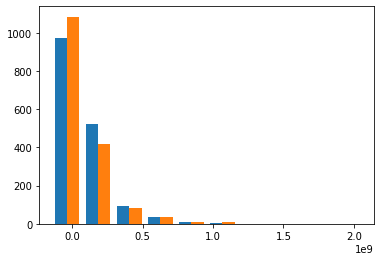

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([predicted,y_test])

In [15]:
model.score(X_test,y_test) 

0.8178807764966888

In [16]:
residuals  = y_test - predicted

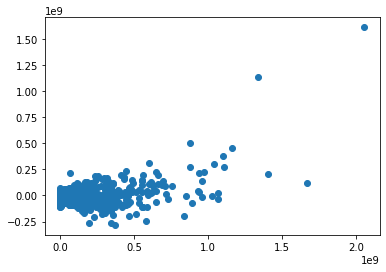

In [17]:
plt.scatter(y_test,residuals)

In [18]:
ap_residuals = np.abs(residuals)/y_test

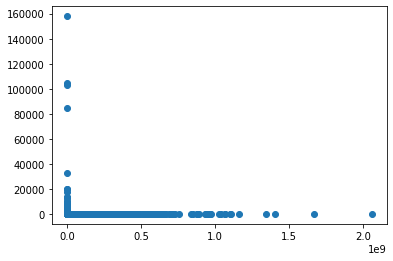

In [19]:
plt.scatter(y_test,ap_residuals)#vemos en donde está la mayor concentración de nuestro error

In [20]:
#utilizamos una escala logaritmica para ver la info de manera mas concisa
lap_residuals = np.log(ap_residuals)

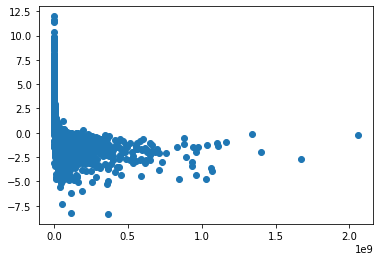

In [21]:
plt.scatter(y_test,lap_residuals)

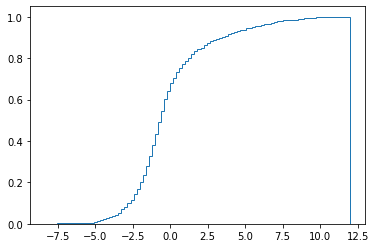

In [23]:
#Veamos la distribuciónd de los datos con la funcion cumulativa de la distribución de los errores
plt.hist(lap_residuals,bins=100,density=True, histtype='step',cumulative=True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

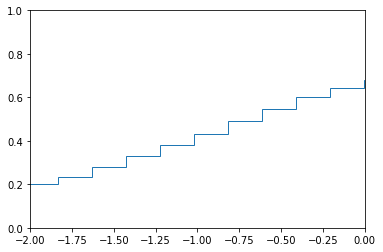

In [24]:
#Zoom a la curva
plt.hist(lap_residuals,bins=100,density=True, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))